In [42]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn as sk
import os

In [43]:
#loading in real estate dataset
real_estate = pd.read_csv('datasets/WakeCountyHousing.csv')
real_estate.head()


,Real_Estate_Id,Deeded_Acreage,Total_Sale_Price,Total_Sale_Date,Month_Year_of_Sale,Year_of_Sale,Year_Built,Year_Remodeled,Heated_Area,Num_Stories,Design_Style,Bath,Utilities,Physical_City,Physical_Zip
0,19,0.21,34500,1/1/1974,January 1974,1974,1964,1964,1828,One Story,Split level,2 Bath,ALL,Raleigh,27610.0
1,20,0.46,35500,5/18/1983,May 1983,1983,1970,1970,1240,One Story,Conventional,1 Bath,E,Raleigh,27610.0
2,22,0.46,37500,9/16/2004,September 2004,2004,1900,1900,2261,One Story,Conventional,2 Bath,WSE,Wendell,27591.0
3,25,0.96,70000,1/1/1971,January 1971,1971,1971,1971,3770,One Story,Conventional,Other,WGE,Raleigh,27613.0
4,30,0.47,380000,8/12/2015,August 2015,2015,1946,2017,1789,One Story,Conventional,2 Bath,ALL,Raleigh,27607.0


In [44]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308292 entries, 0 to 308291
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Real_Estate_Id      308292 non-null  int64  
 1   Deeded_Acreage      308292 non-null  float64
 2   Total_Sale_Price    308292 non-null  int64  
 3   Total_Sale_Date     308292 non-null  object 
 4   Month_Year_of_Sale  308292 non-null  object 
 5   Year_of_Sale        308292 non-null  int64  
 6   Year_Built          308292 non-null  int64  
 7   Year_Remodeled      308292 non-null  int64  
 8   Heated_Area         308292 non-null  int64  
 9   Num_Stories         308292 non-null  object 
 10  Design_Style        308292 non-null  object 
 11  Bath                308275 non-null  object 
 12  Utilities           306324 non-null  object 
 13  Physical_City       308183 non-null  object 
 14  Physical_Zip        308146 non-null  float64
dtypes: float64(2), int64(6), object(7)

### Cleaning the Data

In [45]:
real_estate = real_estate.dropna()
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306161 entries, 0 to 308291
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Real_Estate_Id      306161 non-null  int64  
 1   Deeded_Acreage      306161 non-null  float64
 2   Total_Sale_Price    306161 non-null  int64  
 3   Total_Sale_Date     306161 non-null  object 
 4   Month_Year_of_Sale  306161 non-null  object 
 5   Year_of_Sale        306161 non-null  int64  
 6   Year_Built          306161 non-null  int64  
 7   Year_Remodeled      306161 non-null  int64  
 8   Heated_Area         306161 non-null  int64  
 9   Num_Stories         306161 non-null  object 
 10  Design_Style        306161 non-null  object 
 11  Bath                306161 non-null  object 
 12  Utilities           306161 non-null  object 
 13  Physical_City       306161 non-null  object 
 14  Physical_Zip        306161 non-null  float64
dtypes: float64(2), int64(6), object(7)

In [46]:
#removing data that is not useful
real_estate = real_estate.drop(['Real_Estate_Id', 'Physical_City', 'Total_Sale_Date', 'Month_Year_of_Sale'], axis=1)
real_estate.head()

,Deeded_Acreage,Total_Sale_Price,Year_of_Sale,Year_Built,Year_Remodeled,Heated_Area,Num_Stories,Design_Style,Bath,Utilities,Physical_Zip
0,0.21,34500,1974,1964,1964,1828,One Story,Split level,2 Bath,ALL,27610.0
1,0.46,35500,1983,1970,1970,1240,One Story,Conventional,1 Bath,E,27610.0
2,0.46,37500,2004,1900,1900,2261,One Story,Conventional,2 Bath,WSE,27591.0
3,0.96,70000,1971,1971,1971,3770,One Story,Conventional,Other,WGE,27613.0
4,0.47,380000,2015,1946,2017,1789,One Story,Conventional,2 Bath,ALL,27607.0


### Creating a Test and Train Set

In [47]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(real_estate, test_size=0.2, random_state=42)

print(train_set.shape)
print(test_set.shape)

real_estate = train_set

(244928, 11)
(61233, 11)


In [8]:
real_estate_labels = real_estate['Total_Sale_Price']
real_estate = real_estate.drop(['Total_Sale_Price'], axis=1)

real_estate_num = real_estate[['Deeded_Acreage', 'Heated_Area']]
real_estate_cat = real_estate[['Year_of_Sale', 'Year_Built', 'Year_Remodeled', 'Num_Stories', 'Design_Style', 'Bath', 'Utilities', 'Physical_Zip']]

### Ordinal Encoder

In [48]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
real_estate_cat_encoded = ordinal_encoder.fit_transform(real_estate_cat)
real_estate_cat_encoded[:10]

array([[ 58., 156., 154.,   1.,   4.,   5.,   0.,  29.],
       [ 59., 160., 158.,   1.,   4.,   5.,   3.,  33.],
       [ 29., 108., 106.,   2.,   4.,   2.,  13.,  18.],
       [ 40., 124., 122.,   1.,  13.,   3.,   0.,  34.],
       [ 55., 147., 145.,   1.,  13.,   3.,   0.,  29.],
       [ 61., 135., 133.,   2.,   4.,   6.,   0.,  24.],
       [ 42., 143., 141.,   0.,   4.,   2.,   9.,  23.],
       [ 60., 106., 104.,   0.,  12.,   1.,   0.,  30.],
       [ 52., 146., 144.,   1.,  13.,   3.,   0.,  28.],
       [ 58., 110., 108.,   1.,   4.,   3.,   0.,  29.]])

In [49]:
#view corresponding categories
ordinal_encoder.categories_

[array([1956, 1958, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
        1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
        1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
        1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
        2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
        2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]),
 array([   0, 1800, 1814, 1820, 1835, 1840, 1841, 1845, 1848, 1850, 1852,
        1854, 1855, 1856, 1860, 1865, 1867, 1868, 1870, 1871, 1872, 1875,
        1876, 1877, 1879, 1880, 1882, 1883, 1884, 1885, 1886, 1887, 1888,
        1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1898, 1899, 1900,
        1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
        1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
        1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
        1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941

### Scaling, Normalizing and Standardizing Numerical Features with StandardScaler

In [50]:
#the standard scaler package scales, normalizes and standardizes data
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
real_estate_num_scaled = std_scale.fit_transform(real_estate_num)
real_estate_num_scaled[:10]

array([[ 1.24720899e-01,  4.01266785e+00],
       [ 4.19795655e-01,  2.91792939e+00],
       [-8.07775913e-02, -2.38499420e-01],
       [-2.17776585e-01, -8.72401285e-01],
       [-2.17776585e-01, -1.07363997e+00],
       [-1.59815472e-01, -7.52664266e-01],
       [ 2.46062501e-02, -9.49878180e-01],
       [ 3.52948181e-03, -4.97091133e-01],
       [-2.23045777e-01, -6.29908667e-01],
       [-5.97008230e-02,  1.00303594e-02]])

### Preparing Data for Predictions

In [51]:
#small pipeline for numerical attributes using skcikit learns Pipeline class
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_attribs = list(real_estate_num)
cat_attribs = list(real_estate_cat)

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat", OrdinalEncoder(), cat_attribs),
    ])


real_estate_prep = full_pipeline.fit_transform(real_estate)
real_estate_prep

array([[ 1.24720899e-01,  4.01266785e+00,  5.80000000e+01, ...,
         5.00000000e+00,  0.00000000e+00,  2.90000000e+01],
       [ 4.19795655e-01,  2.91792939e+00,  5.90000000e+01, ...,
         5.00000000e+00,  3.00000000e+00,  3.30000000e+01],
       [-8.07775913e-02, -2.38499420e-01,  2.90000000e+01, ...,
         2.00000000e+00,  1.30000000e+01,  1.80000000e+01],
       ...,
       [-5.97008230e-02,  1.18627049e+00,  4.30000000e+01, ...,
         5.00000000e+00,  0.00000000e+00,  3.00000000e+00],
       [-2.07238201e-01, -8.39196902e-01,  6.00000000e+01, ...,
         3.00000000e+00,  0.00000000e+00,  2.40000000e+01],
       [-5.44316309e-02, -3.93453209e-01,  6.00000000e+01, ...,
         3.00000000e+00,  0.00000000e+00,  3.00000000e+00]])

### Analyzing Prices to Come up with Classes


In [52]:
real_estate_labels.describe()

count    2.449280e+05
mean     2.731229e+05
std      1.893739e+05
min      0.000000e+00
25%      1.500000e+05
50%      2.350000e+05
75%      3.500000e+05
max      6.100200e+06
Name: Total_Sale_Price, dtype: float64

I will classify with expensive vs not-expensive. If the price is within the 4th quartile, it is expensive.

In [14]:
real_estate_train_exp = (real_estate_labels >= 3.500000e+05)

### Use SGDClassifier

In [53]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(real_estate_prep, real_estate_train_exp)

SGDClassifier(random_state=42)

### Use StratifiedKFold Cross Validation

In [66]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

exp_array = real_estate_train_exp.to_numpy()

for train_index, test_index in skfolds.split(real_estate_prep, exp_array):
    clone_clf = clone(sgd_clf)
    X_train_folds = real_estate_prep[train_index]
    y_train_folds = exp_array[train_index]
    X_test_fold = real_estate_prep[test_index]
    y_test_fold = exp_array[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))



0.8777849907524221
0.8758374875984469
0.8710345165478552


### Generate a Confusion Matrix

In [16]:
from sklearn.model_selection import cross_val_predict
sgd_pred = cross_val_predict(sgd_clf, real_estate_prep, real_estate_train_exp, cv=3)

In [17]:
from sklearn.metrics import confusion_matrix

confusion_matrix(real_estate_train_exp, sgd_pred)

array([[163007,  19703],
       [ 16699,  45519]])

### Generate a ROC Curve

In [18]:
from sklearn.metrics import roc_curve
sgd_scores = cross_val_predict(sgd_clf, real_estate_prep, real_estate_train_exp, cv=3, method ="decision_function")

fpr, tpr, thresholds = roc_curve(real_estate_train_exp, sgd_scores)

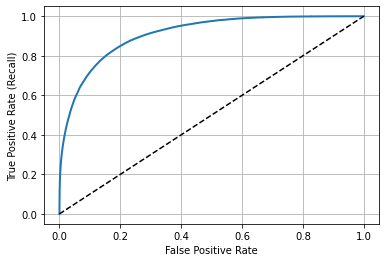

In [19]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.grid()


plot_roc_curve(fpr, tpr)
plt.show()


In [20]:
from sklearn.metrics import roc_auc_score
roc_auc_score(real_estate_train_exp, sgd_scores)

0.9093334438983549

### Use Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_probs = cross_val_predict(forest_clf, real_estate_prep, real_estate_train_exp, cv=3, method="predict_proba")

forest_scores = forest_probs[:,1]

In [22]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(real_estate_train_exp,forest_scores)

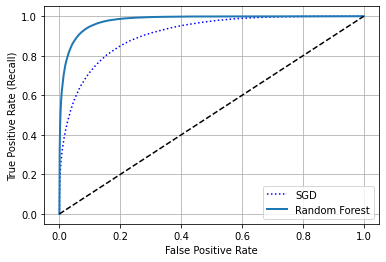

In [23]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [24]:
roc_auc_score(real_estate_train_exp, forest_scores)

0.9788256163228771

### Creating Multiple Class Labels

In [60]:
#creating 4 brackets for the house prices
mult_labels = real_estate_labels.copy()
for idx in real_estate_labels.index.to_list():
    if real_estate_labels[idx] <= 1.500000e+05:
        mult_labels[idx] = "low"
    elif real_estate_labels[idx] <= 2.350000e+05:
        mult_labels[idx] = "mid-low"
    elif real_estate_labels[idx] <= 3.500000e+05:
        mult_labels[idx] = "mid-high"
    elif real_estate_labels[idx] <= 6.100200e+06:
        mult_labels[idx] = "high"

print(real_estate_labels)
print(mult_labels[:10])

6054      1365000
286956    1450000
46456       75000
62726      106000
196513     122500
           ...   
120252     215000
260963     265000
132371     355000
147398     171000
122342     315000
Name: Total_Sale_Price, Length: 244928, dtype: int64
6054         high
286956       high
46456         low
62726         low
196513        low
105195    mid-low
169307        low
17934     mid-low
196249    mid-low
32206        high
Name: Total_Sale_Price, dtype: object


### Use OvR Classifier

In [28]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SGDClassifier())
ovr_clf.fit(real_estate_prep, mult_labels)

OneVsRestClassifier(estimator=SGDClassifier())

In [40]:
print(len(ovr_clf.estimators_))

print(ovr_clf.predict([real_estate_prep[1]]))
ovr_clf.decision_function([real_estate_prep[1]])


4
['high']


array([[ 144.26630938, -375.51115345,   -1.4997718 ,   -7.28540261]])

### Use KNeighbors Classifier

In [61]:
from sklearn.neighbors import KNeighborsClassifier

real_estate_train_cheap = (real_estate_labels <= 1.500000e+05)
exp_or_cheap = np.c_[real_estate_train_exp,real_estate_train_cheap]

knn_clf = KNeighborsClassifier()
knn_clf.fit(real_estate_prep, exp_or_cheap)
knn_clf.predict([real_estate_prep[5]])

array([[False, False]])